In [1]:
from tensorflow import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
from keras.datasets.mnist import load_data

In [17]:
(x_train, y_train), (x_test, y_test)=digits=load_data(path="mnist.npz")

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

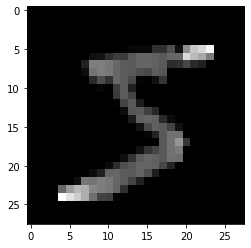

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [22]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [8]:
model1=Sequential()
model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model1.add(Flatten())
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(10,activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model1.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 39s 4ms/step - loss: 0.3300 - accuracy: 0.8993
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9900


In [13]:
pridictions=model1.predict(x_test)

In [19]:
print(np.argmax(pridictions[1]))

2


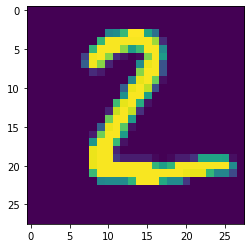

In [20]:
plt.imshow(x_test[1])

In [21]:
from tensorflow.keras.models import load_model

model1.save('mnist_model_cnn.h5')

In [23]:
val_loss,val_acc=model1.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 30.0345 - accuracy: 0.9733
30.034534454345703 0.9732999801635742
